In [1]:
#Import the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Load the dataset
df= pd.read_csv('HR.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df=df.rename(columns = {'sales':'department'})

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])
df['department']=np.where(df['department'] =='IT', 'technical', df['department'])

In [11]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,technical,low
14995,0.37,0.48,2,160,3,0,1,0,technical,low
14996,0.37,0.53,2,143,3,0,1,0,technical,low
14997,0.11,0.96,6,280,4,0,1,0,technical,low


In [12]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [13]:
#checking for null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [14]:
#checking for duplicate values
df.duplicated().sum()

3012

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [16]:
#Determine number of employees who left and stayed
print("Number of employees:\n", df['left'].value_counts())

Number of employees:
 0    11428
1     3571
Name: left, dtype: int64


## Observation-
### 0 indicates 'NO' and 1 indicates 'YES' 
### Out of 14000 3571 employess are attrited which is 25.5 %
### through this it is specified that there are more NO S` than yes and this may lead to type 2 error ,so this variable need to be balanced 

In [17]:
#Determine number of employees in each department
print("Number of employees:\n", df['department'].value_counts())

Number of employees:
 technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


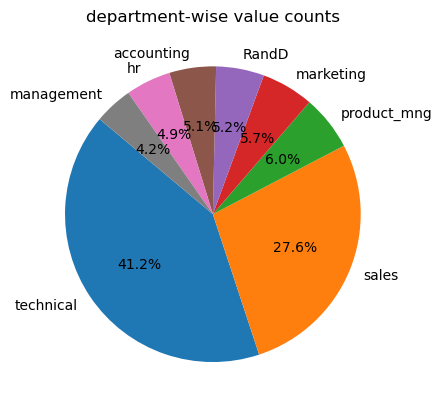

In [18]:
#Graphical representation of Department wise employee count
department_counts=df['department'].value_counts()
plt.pie(department_counts,labels=department_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('department-wise value counts')
plt.show()

In [19]:
#Determine number of unique values in work_accidents
print("Number of employees:\n", df['Work_accident'].value_counts())

Number of employees:
 0    12830
1     2169
Name: Work_accident, dtype: int64


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

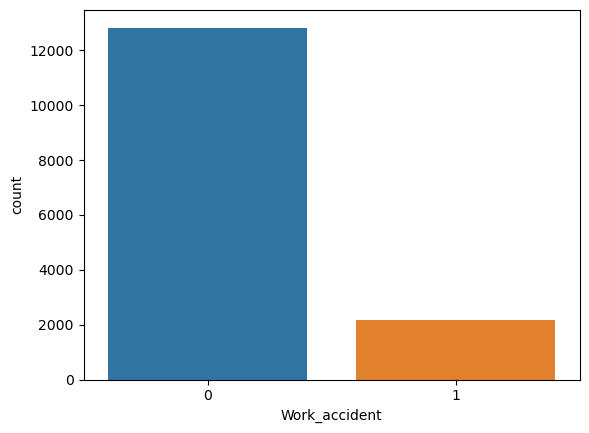

In [20]:
sns.countplot(x='Work_accident',data=df)

In [21]:
df1=df[['department','left']]
df2=df1[df1['left']==1]
df3=df2['department'].value_counts().reset_index(name='left_count')
print(df3)

         index  left_count
0    technical        1525
1        sales        1014
2           hr         215
3   accounting         204
4    marketing         203
5  product_mng         198
6        RandD         121
7   management          91


In [22]:
import pandas as pd

# Assuming your original DataFrame is named original_df
# Selecting only the 'department' and 'left' columns
new_df = df[['department', 'left']]

# Getting the count of people in each department
total_counts = new_df['department'].value_counts().reset_index(name='total_count')

# Getting the count of people who left from each department
left_counts = new_df[new_df['left'] == 1]['department'].value_counts().reset_index(name='left_count')

# Merging the total and left counts on the 'index' column
result_df = pd.merge(total_counts, left_counts, on='index', how='left')

# Renaming columns for clarity
result_df.columns = ['department', 'total_count', 'left_count']

# Handling NaN values in case there are departments with no people who left
result_df['left_count'].fillna(0, inplace=True)

# Calculating the rate of people left in each department
result_df['left_rate'] = result_df['left_count'] / result_df['total_count']*100

# Displaying the result DataFrame with department, total count, left count, and left rate
print(result_df)

    department  total_count  left_count  left_rate
0    technical         6176        1525  24.692358
1        sales         4140        1014  24.492754
2  product_mng          902         198  21.951220
3    marketing          858         203  23.659674
4        RandD          787         121  15.374841
5   accounting          767         204  26.597132
6           hr          739         215  29.093369
7   management          630          91  14.444444


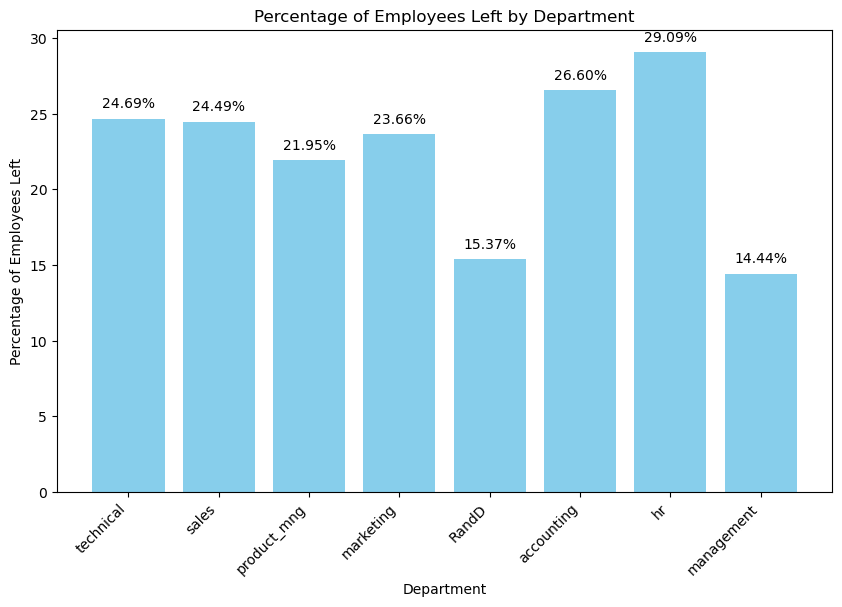

In [23]:
# Plotting a bar graph with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(result_df['department'], result_df['left_rate'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Percentage of Employees Left')
plt.title('Percentage of Employees Left by Department')
plt.xticks(rotation=45, ha='right')

# Adding labels to each bar
for bar, label in zip(bars, result_df['left_rate']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{label:.2f}%', ha='center', va='bottom')

plt.show()

In [24]:
# Access the unique values in the 'promotion_last_5years' column
unique_promotion_values = df['promotion_last_5years'].unique()
unique_promotion_values

array([0, 1], dtype=int64)

In [25]:
# Create a DataFrame with value counts for 'promotion_last_5years' column, grouped by 'department'
promotion_department_counts = df.groupby('department')['promotion_last_5years'].value_counts().unstack().fillna(0)

# Print the resulting DataFrame
print("Value counts of 'promotion_last_5years' column department-wise:")
print(promotion_department_counts)

Value counts of 'promotion_last_5years' column department-wise:
promotion_last_5years       0      1
department                          
RandD                   760.0   27.0
accounting              753.0   14.0
hr                      724.0   15.0
management              561.0   69.0
marketing               815.0   43.0
product_mng             902.0    0.0
sales                  4040.0  100.0
technical              6125.0   51.0


In [26]:
merged_df = pd.merge(result_df, promotion_department_counts, on='department', how='inner')

# Rename the columns for clarity
merged_df.rename(columns={'0': 'promotion_not_last_5_years', '1': 'promotion_last_5_years'}, inplace=True)

# Print the resulting DataFrame
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
    department  total_count  left_count  left_rate       0      1
0    technical         6176        1525  24.692358  6125.0   51.0
1        sales         4140        1014  24.492754  4040.0  100.0
2  product_mng          902         198  21.951220   902.0    0.0
3    marketing          858         203  23.659674   815.0   43.0
4        RandD          787         121  15.374841   760.0   27.0
5   accounting          767         204  26.597132   753.0   14.0
6           hr          739         215  29.093369   724.0   15.0
7   management          630          91  14.444444   561.0   69.0


### Management Department have highest last_promotion_count which lead to low left rate 
### Accounting and HR department have high left_rate as this department have low promotion count
### even though technical and sales department have high promotion count but these departments have more left_rate

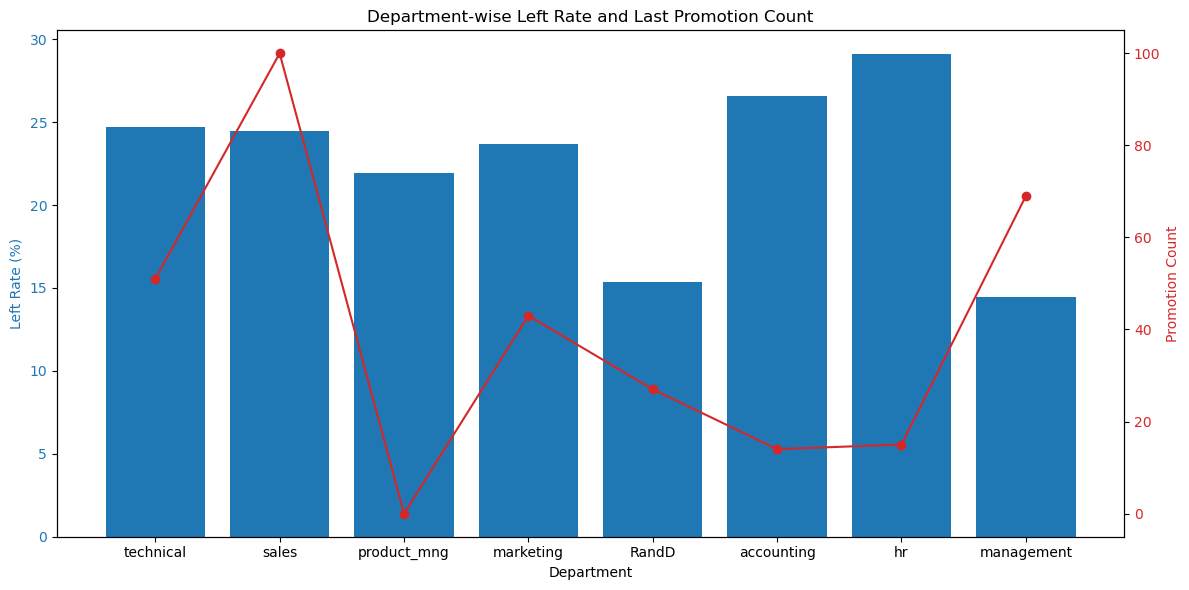

In [27]:
# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['department', 'left', 'promotion_last_5years']
new_df = df[selected_columns]

# Getting the count of people in each department
total_counts = new_df['department'].value_counts().reset_index(name='total_count')

# Getting the count of people who left from each department
left_counts = new_df[new_df['left'] == 1]['department'].value_counts().reset_index(name='left_count')

# Getting the count of people who received the last promotion in each department
promotion_counts = new_df[new_df['promotion_last_5years'] == 1]['department'].value_counts().reset_index(name='promotion_count')

# Merging the total, left, and promotion counts on the 'index' column
result_df = pd.merge(total_counts, left_counts, on='index', how='left')
result_df = pd.merge(result_df, promotion_counts, on='index', how='left')

# Renaming columns for clarity
result_df.columns = ['department', 'total_count', 'left_count', 'promotion_count']

# Handling NaN values in case there are departments with no people who left or received the last promotion
result_df['left_count'].fillna(0, inplace=True)
result_df['promotion_count'].fillna(0, inplace=True)

# Calculating the rate of people left in each department as a percentage
result_df['left_rate_percentage'] = (result_df['left_count'] / result_df['total_count']) * 100

# Plotting a bar graph for department-wise left rate and last promotion count
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for left rate
color = 'tab:blue'
ax1.set_xlabel('Department')
ax1.set_ylabel('Left Rate (%)', color=color)
ax1.bar(result_df['department'], result_df['left_rate_percentage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for promotion count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Promotion Count', color=color)
ax2.plot(result_df['department'], result_df['promotion_count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Department-wise Left Rate and Last Promotion Count')
plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

In [28]:
import pandas as pd

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['department', 'satisfaction_level']
new_df = df[selected_columns]

# Grouping by department and calculating the average satisfaction level
average_satisfaction = new_df.groupby('department')['satisfaction_level'].mean().reset_index(name='average_satisfaction')

# Setting the 'department' column as the index
average_satisfaction.set_index('department', inplace=True)

# Displaying the resulting DataFrame
print(average_satisfaction)

             average_satisfaction
department                       
RandD                    0.619822
accounting               0.582151
hr                       0.598809
management               0.621349
marketing                0.618601
product_mng              0.619634
sales                    0.614447
technical                0.613687


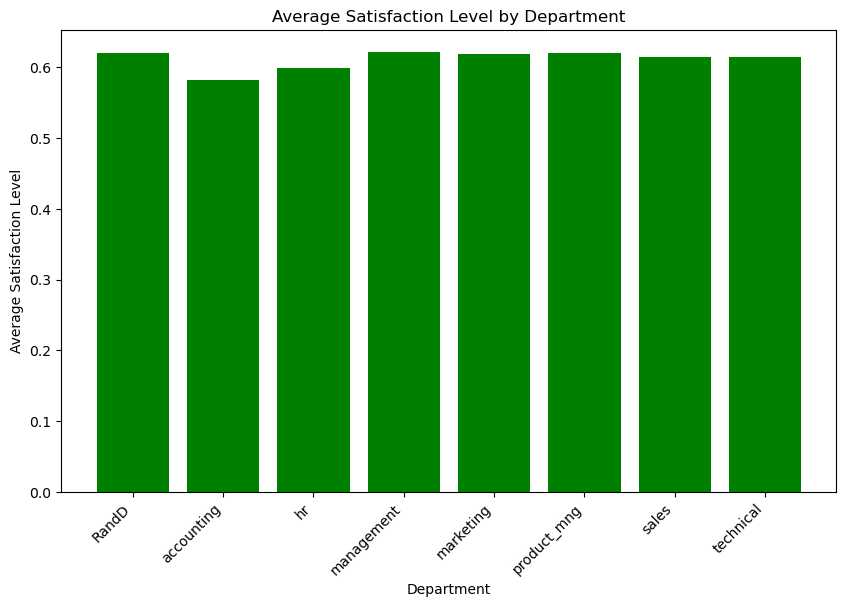

In [29]:
# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['department', 'satisfaction_level']
new_df = df[selected_columns]

# Grouping by department and calculating the average satisfaction level
average_satisfaction = new_df.groupby('department')['satisfaction_level'].mean().reset_index(name='average_satisfaction')

# Plotting a bar graph for average satisfaction level by department
plt.figure(figsize=(10, 6))
plt.bar(average_satisfaction['department'], average_satisfaction['average_satisfaction'], color='green')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Department')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'time_spend_company']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Grouping by satisfaction range and calculating the average time spent in the company
average_time_spend = new_df.groupby('satisfaction_range')['time_spend_company'].mean().reset_index(name='average_time_spend')

# Displaying the resulting DataFrame
print(average_time_spend)

  satisfaction_range  average_time_spend
0         (0.1, 0.3]            4.337896
1         (0.3, 0.5]            3.269592
2         (0.5, 0.7]            3.269221
3         (0.7, 0.9]            3.554940


C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\2366837934.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
import pandas as pd

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'left']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Filtering only the rows where 'left' is 1 (employees who left)
left_yes_df = new_df[new_df['left'] == 1]

# Grouping by satisfaction range and calculating the average count of 'yes' values
average_left_counts = left_yes_df.groupby('satisfaction_range').size().reset_index(name='average_left_counts')

# Displaying the resulting DataFrame
print(average_left_counts)

  satisfaction_range  average_left_counts
0         (0.1, 0.3]                  394
1         (0.3, 0.5]                 1603
2         (0.5, 0.7]                   88
3         (0.7, 0.9]                  870


C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\1521321101.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\2036720713.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



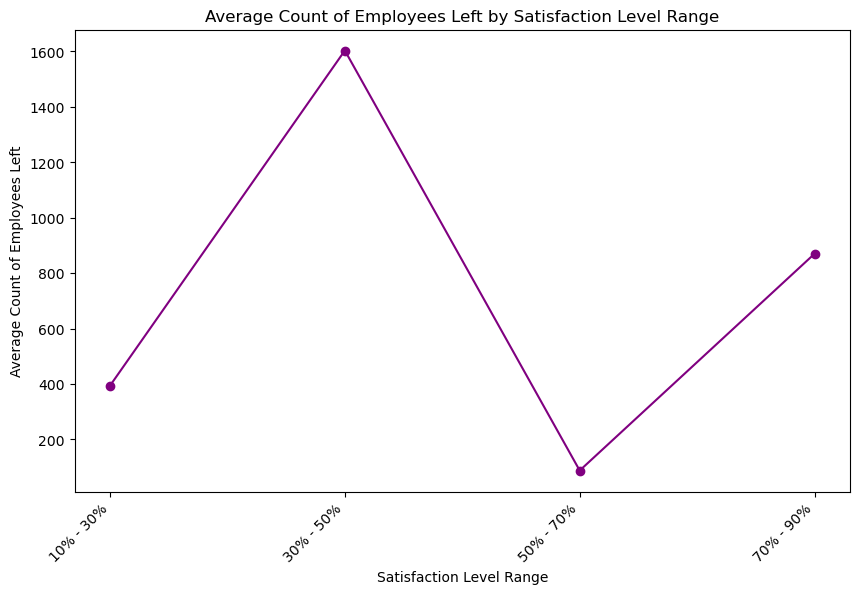

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'left']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Filtering only the rows where 'left' is 1 (employees who left)
left_yes_df = new_df[new_df['left'] == 1]

# Grouping by satisfaction range and calculating the average count of 'yes' values
average_left_counts = left_yes_df.groupby('satisfaction_range').size().reset_index(name='average_left_counts')

# Converting float intervals to percentages
average_left_counts['satisfaction_range'] = average_left_counts['satisfaction_range'].apply(lambda x: f'{int(x.left*100)}% - {int(x.right*100)}%')

# Plotting a line chart
plt.figure(figsize=(10, 6))
plt.plot(average_left_counts['satisfaction_range'], average_left_counts['average_left_counts'], marker='o', linestyle='-', color='purple')
plt.xlabel('Satisfaction Level Range')
plt.ylabel('Average Count of Employees Left')
plt.title('Average Count of Employees Left by Satisfaction Level Range')
plt.xticks(rotation=45, ha='right')
plt.show()

### intresting observation can be drawn from  above analysis is that even though the satifaction level is high 
the average left is also high comparetively to the employees with less satisfaction
so we can derive inferance that satisfaction level is not whole and sole factor for attrition

In [33]:
import pandas as pd

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'salary']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Grouping by satisfaction range and salary, and calculating the value counts
salary_counts = new_df.groupby(['satisfaction_range', 'salary']).size().reset_index(name='count')

# Pivoting the DataFrame to have salary levels as columns
salary_counts_pivot = salary_counts.pivot(index='satisfaction_range', columns='salary', values='count').reset_index()

# Renaming columns for clarity
salary_counts_pivot.columns = ['satisfaction_range', 'low', 'medium', 'high']

# Calculating the average value counts for each salary level
salary_counts_pivot['average_low'] = salary_counts_pivot['low'] / len(df['salary'].unique())
salary_counts_pivot['average_medium'] = salary_counts_pivot['medium'] / len(df['salary'].unique())
salary_counts_pivot['average_high'] = salary_counts_pivot['high'] / len(df['salary'].unique())

# Displaying the resulting DataFrame
print(salary_counts_pivot)

  satisfaction_range  low  medium  high  average_low  average_medium  \
0         (0.1, 0.3]  115     705   568    38.333333      235.000000   
1         (0.3, 0.5]  194    1537  1140    64.666667      512.333333   
2         (0.5, 0.7]  384    1753  1752   128.000000      584.333333   
3         (0.7, 0.9]  378    2155  1981   126.000000      718.333333   

   average_high  
0    189.333333  
1    380.000000  
2    584.000000  
3    660.333333  


C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\2184199979.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
import pandas as pd

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'salary', 'left']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Grouping by satisfaction range, salary, and left, and calculating the value counts
counts_df = new_df.groupby(['satisfaction_range', 'salary', 'left']).size().reset_index(name='count')

# Pivoting the DataFrame to have salary levels and 'left' as columns
counts_pivot = counts_df.pivot_table(index=['satisfaction_range', 'salary'], columns='left', values='count', fill_value=0).reset_index()

# Renaming columns for clarity
counts_pivot.columns = ['satisfaction_range', 'salary', 'left_0', 'left_1']

# Displaying the resulting DataFrame
print(counts_pivot)

   satisfaction_range  salary  left_0  left_1
0          (0.1, 0.3]    high     112       3
1          (0.1, 0.3]     low     457     248
2          (0.1, 0.3]  medium     425     143
3          (0.3, 0.5]    high     146      48
4          (0.3, 0.5]     low     549     988
5          (0.3, 0.5]  medium     573     567
6          (0.5, 0.7]    high     381       3
7          (0.5, 0.7]     low    1698      55
8          (0.5, 0.7]  medium    1722      30
9          (0.7, 0.9]    high     363      15
10         (0.7, 0.9]     low    1635     520
11         (0.7, 0.9]  medium    1646     335


C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\3858040931.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\saiku\AppData\Local\Temp\ipykernel_18808\530774276.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

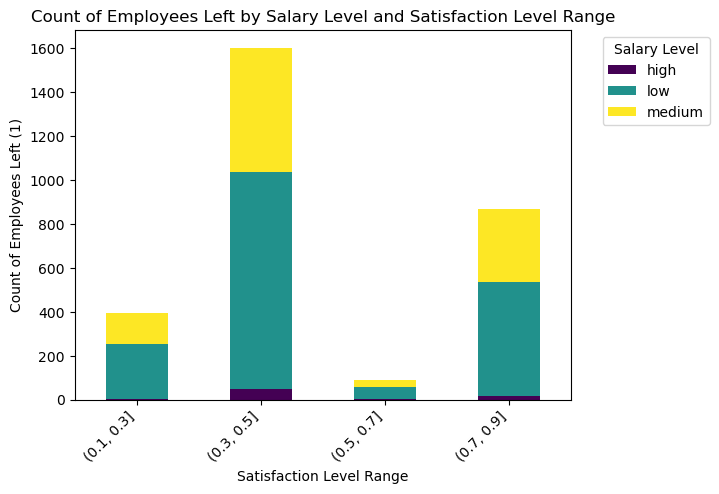

In [35]:

# Assuming your original DataFrame is named original_df
# Selecting relevant columns
selected_columns = ['satisfaction_level', 'salary', 'left']
new_df = df[selected_columns]

# Defining satisfaction level ranges
satisfaction_ranges = [0.1, 0.3, 0.5, 0.7, 0.9]

# Creating a new column 'satisfaction_range' based on the ranges
new_df['satisfaction_range'] = pd.cut(new_df['satisfaction_level'], bins=satisfaction_ranges)

# Filtering only the rows where 'left' is 1 (employees who left)
left_yes_df = new_df[new_df['left'] == 1]

# Grouping by satisfaction range and salary, and calculating the count of 'left' values (1)
left_counts = left_yes_df.groupby(['satisfaction_range', 'salary']).size().reset_index(name='left_count')

# Pivoting the DataFrame to have salary levels as columns
left_counts_pivot = left_counts.pivot(index='satisfaction_range', columns='salary', values='left_count').reset_index()

# Plotting a stacked bar graph
plt.figure(figsize=(10, 6))
left_counts_pivot.plot(kind='bar', x='satisfaction_range', stacked=True, colormap='viridis')
plt.xlabel('Satisfaction Level Range')
plt.ylabel('Count of Employees Left (1)')
plt.title('Count of Employees Left by Salary Level and Satisfaction Level Range')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### The above Data Frame represents different intervels of satisfation levels of employees and average of value_counts of low,medium and high salary

observation
### majority of Employees having high and medium salary have their satisfaction level more than 0.5

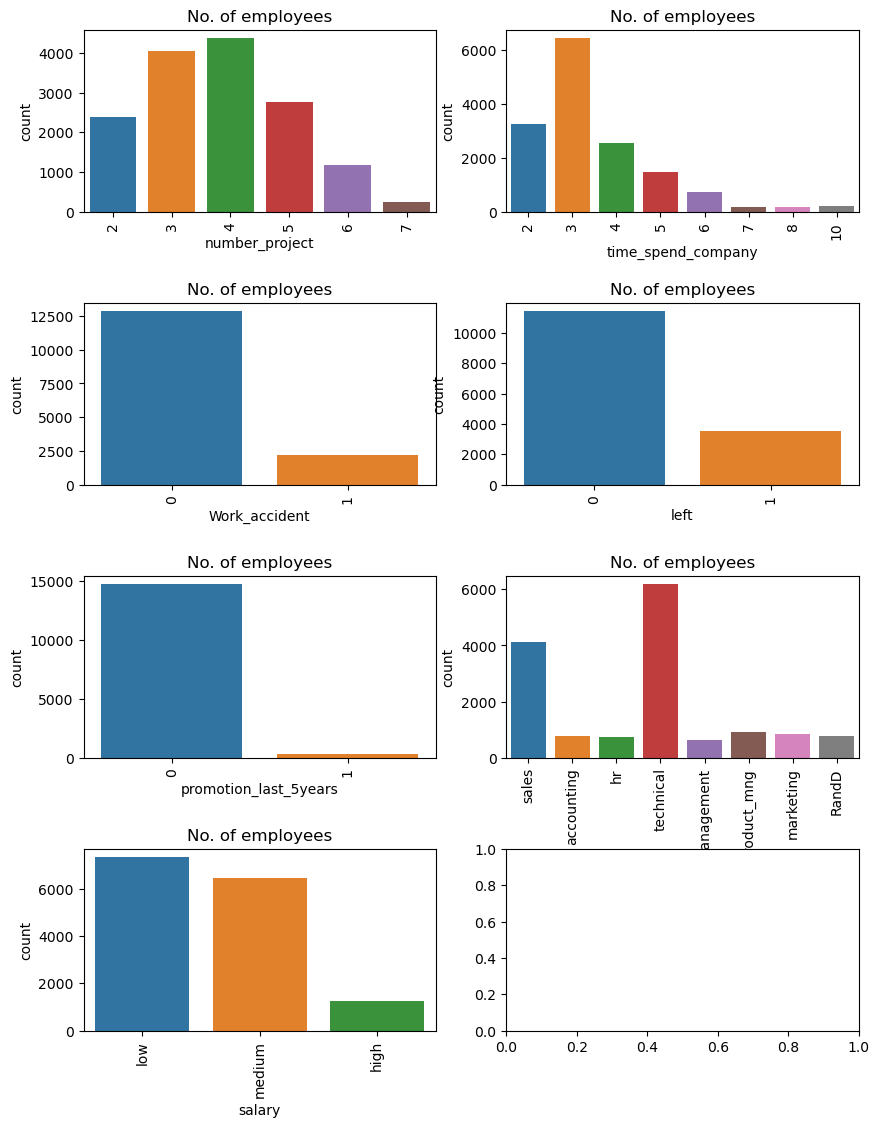

In [36]:
#let count no of of different categories in catgorical variables
#categorical variables are left, promotion_last_5years,sal,salary,work_accident
#more than two or three categories are number_project,time spend_company
    
categorical = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical)/2)), ncols=2, figsize=(10, 13))
fig.subplots_adjust(hspace=0.5)

for i, ax in zip(categorical, axes.flatten()):
    sns.countplot(x=i, data=df, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title("No. of employees")

plt.show()

Observations from graphs
the maximum employee are doing project between 3-5

There is a lot number of employees who are working in company for last three years but after that there is huge drop for 4 year

The no of employee left are 20 % of total data

A very less number of employee get the promotion in last 5 year

Sales department is having maximum no.of employee followed by technical and support

The maximum employees are getting salary either medium or low

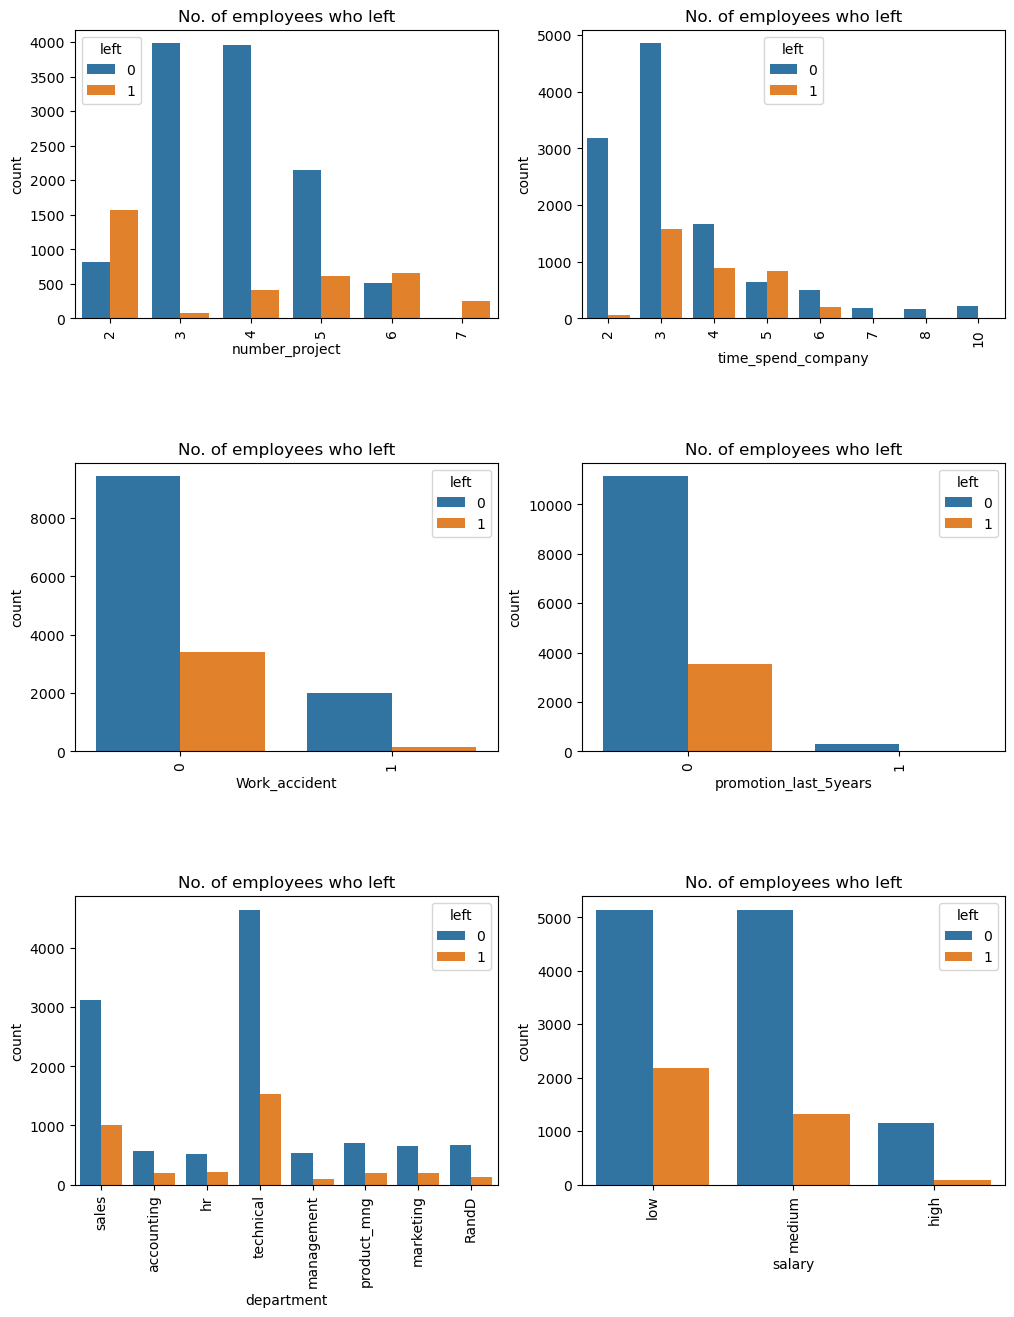

In [37]:
# here we will do it only for categorical variable

categorical = ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary']
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical)/2)), ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)

for i, ax in zip(categorical, axes.flatten()):
    sns.countplot(x=i, data=df, hue="left", ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title("No. of employees who left")

plt.show()


### observations

Some interesting observations are here :

Those who promotion in last 5 years they didn't leave i.e All those left they didn't get the promotion in last 5 years

from these graphs we can't make so much interpenetration because it is like that sales department have more number of employees so more number of employees left so for this we need the calculation of proportions.

But one point interesting to note that those who have spent 5 years in company are leaving more in proportion.it may be because they didn't get the promotion in last 5 years

And who have spent more than 6 years they are not leaving it may be because affection to the company

and more interesting point here those all who have done 7 projects have left the company it seems to like that the person for more than 6 years they are not leaving the company so it means those have done more number of projects in less year they are leaving the company

So here we are talking about in may be to get the full detail we will do further analysis


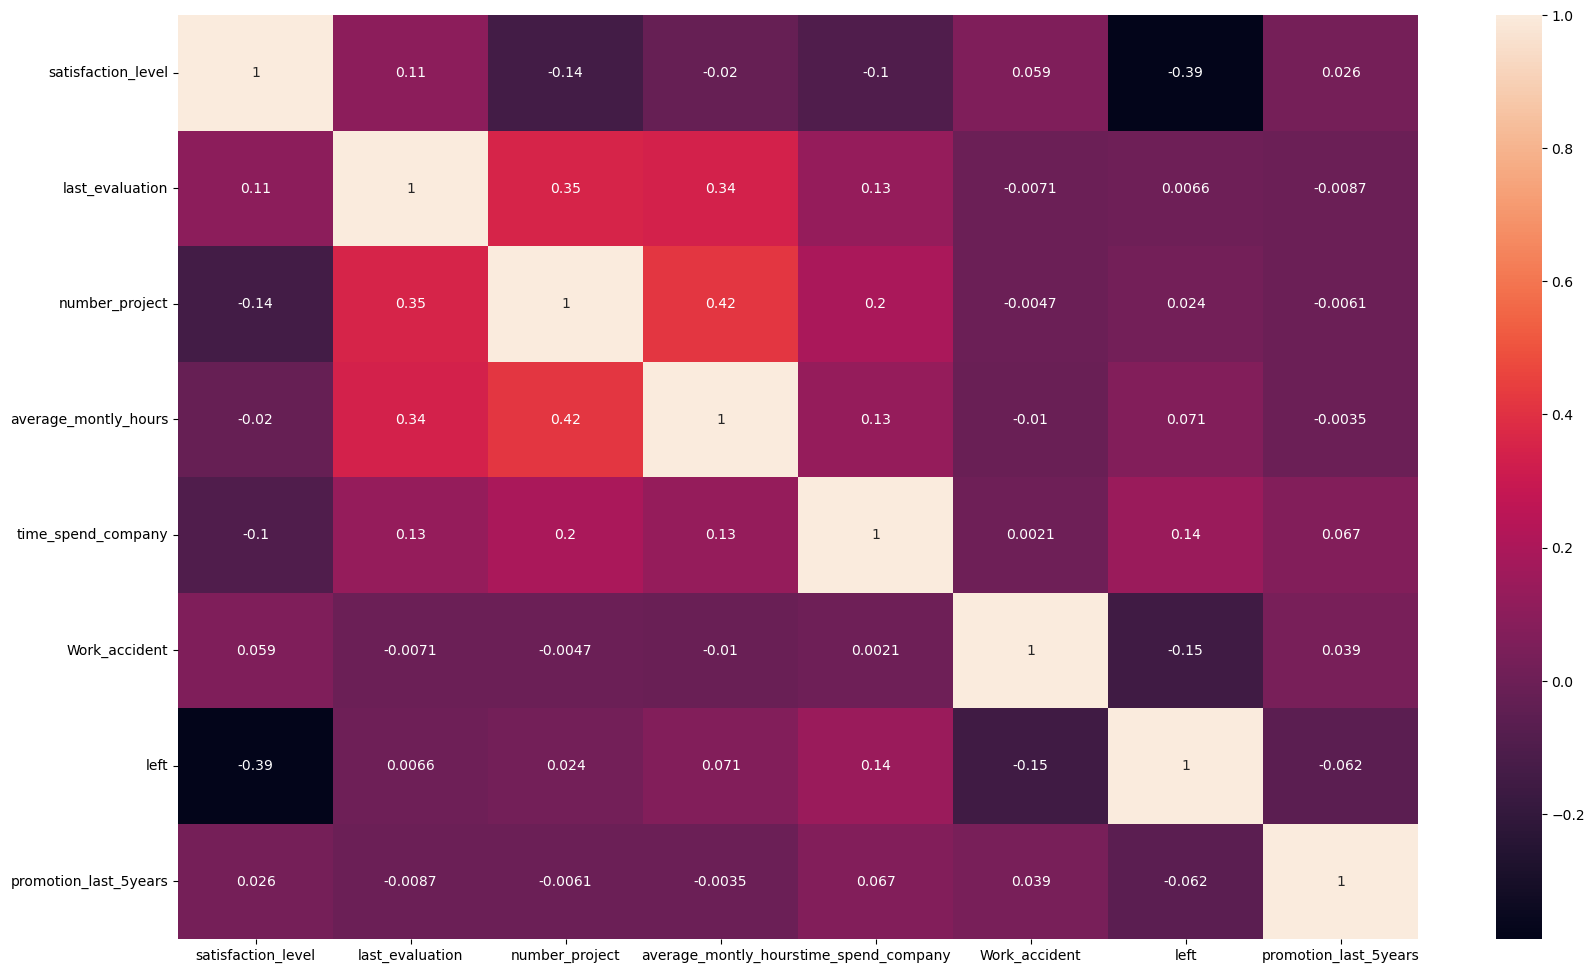

In [38]:
 fig,ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Analyzing the correlation matrix, we can draw some conclusions about the relationships between variables:

1. *Negative Correlation with 'left':*
   - *Satisfaction Level (-0.388375):* There is a moderate negative correlation between satisfaction level and the likelihood of an employee leaving. As satisfaction level decreases, the probability of an employee leaving increases.

2. *Positive Correlations:*
   - *Number of Projects (0.349333):* Employees with more projects tend to have a higher evaluation. However, this may contribute to lower satisfaction and a higher likelihood of leaving.
   - *Average Monthly Hours (0.339742):* Employees who work more hours tend to have higher evaluations. Again, this may contribute to lower satisfaction and a higher likelihood of leaving.
   - *Time Spent in Company (0.144822):* There is a positive correlation, but it's not very strong. Longer tenure is associated with a slightly higher evaluation.

3. *Other Notable Observations:*
   - *Work Accident (-0.154622):* There is a moderate negative correlation with the occurrence of work accidents and the likelihood of leaving. Employees who experienced a work accident are less likely to leave.
   - *Last Evaluation (0.006567):* There is a very weak positive correlation with the last evaluation. It suggests that the last evaluation is not strongly associated with the likelihood of leaving.
   
   4. *Weak or Negligible Correlations:*
   - *Promotion Last 5 Years (and other variables):* Most variables, including promotion in the last 5 years, show weak or negligible correlations with the likelihood of leaving.

It's essential to note that correlation does not imply causation, and the observed relationships are based on statistical associations. Further analysis, such as regression or more sophisticated modeling, may be necessary to understand the underlying dynamics. Also, consider domain knowledge and context in drawing conclusions about the dataset.




1. *Multicollinearity:*
   - *High Correlation between Number of Projects and Average Monthly Hours:* The positive correlation (0.417211) between the number of projects and average monthly hours suggests multicollinearity. It's important to be cautious when including both in the same predictive model, as they provide similar information.

2. *Key Predictors of Employee Attrition ('left'):*
   - *Satisfaction Level (-0.388375):* The strongest negative correlation indicates that dissatisfaction is a significant predictor of employee attrition.
   - *Number of Projects (0.349333) and Average Monthly Hours (0.339742):* Both show positive correlations with employee attrition, suggesting that workload and working hours might contribute to employees leaving.

3. *Moderate Predictors of Employee Attrition:*
   - *Work Accident (-0.154622):* A moderate negative correlation suggests that employees who had a work accident are less likely to leave. This might be related to improved job security or loyalty after a workplace accident.
4. *Variables with Weak Associations to Attrition:*
   - *Last Evaluation (0.006567):* The very weak positive correlation implies that the last evaluation alone is not a strong predictor of attrition.
   - *Promotion Last 5 Years (0.025605):* The weak positive correlation suggests a slight positive association, but it's not a strong predictor.

5. *Feature Selection for Model Building:*
   - *Consider Dropping Variables:* Given the multicollinearity between 'Number of Projects' and 'Average Monthly Hours,' you might consider dropping one of them in model building to avoid redundancy.
   - *Focus on Key Predictors:* Prioritize variables with stronger correlations, such as 'Satisfaction Level,' 'Number of Projects,' and 'Average Monthly Hours,' when building predictive models for employee attrition.

6. *Interaction Effects:*
   - *Explore Interaction Effects:* Consider exploring interaction effects between variables, especially between workload-related features ('Number of Projects' and 'Average Monthly Hours') and 'Satisfaction Level,' to capture potential nonlinear relationships.

Remember, the conclusions drawn from correlation analysis provide insights, but building an effective predictive model may require additional techniques such as feature engineering, handling imbalances in the target variable, and thorough validation. Always validate the model's performance on a separate dataset to ensure generalizability.

In [40]:
# Select columns with data type 'object' or 'category' (categorical variables)
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:")
print(categorical_vars)

for col in categorical_vars:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

df_cate=df[categorical_vars]
df_cate.shape

Categorical variables:
Index(['department', 'salary'], dtype='object')


(14999, 2)

In [41]:
# Select columns with numeric data types (continuous variables)
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("\nContinuous variables:")
print(continuous_vars)

for col in continuous_vars:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

df_cont=df[continuous_vars]


Continuous variables:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')


In [42]:
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,29,17,0,61,1,0,1,0,6,1
1,71,50,3,166,4,0,1,0,6,2
2,2,52,5,176,2,0,1,0,6,2
3,63,51,3,127,3,0,1,0,6,1
4,28,16,0,63,1,0,1,0,6,1
...,...,...,...,...,...,...,...,...,...,...
14994,31,21,0,55,1,0,1,0,7,1
14995,28,12,0,64,1,0,1,0,7,1
14996,28,17,0,47,1,0,1,0,7,1
14997,2,60,4,184,2,0,1,0,7,1


In [43]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [44]:
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,29,17,0,61,1,0,1,0,6,1
1,71,50,3,166,4,0,1,0,6,2
2,2,52,5,176,2,0,1,0,6,2
3,63,51,3,127,3,0,1,0,6,1
4,28,16,0,63,1,0,1,0,6,1
...,...,...,...,...,...,...,...,...,...,...
14994,31,21,0,55,1,0,1,0,7,1
14995,28,12,0,64,1,0,1,0,7,1
14996,28,17,0,47,1,0,1,0,7,1
14997,2,60,4,184,2,0,1,0,7,1


In [45]:
# separate a y-variable from the DataFrame
y = df.left
# y
# update the baseline DataFrame minus the y-variable
X = df_encoded.drop(['left'], axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,29,17,0,61,1,0,0,6,1
1,71,50,3,166,4,0,0,6,2
2,2,52,5,176,2,0,0,6,2
3,63,51,3,127,3,0,0,6,1
4,28,16,0,63,1,0,0,6,1
...,...,...,...,...,...,...,...,...,...
14994,31,21,0,55,1,0,0,7,1
14995,28,12,0,64,1,0,0,7,1
14996,28,17,0,47,1,0,0,7,1
14997,2,60,4,184,2,0,0,7,1


In [46]:
from sklearn.feature_selection import RFE

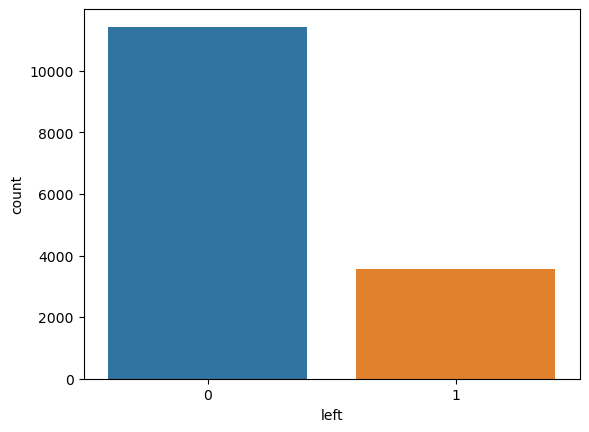

In [51]:
imbalanced = sns.countplot(x='left', data=df)

In [52]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X,y)

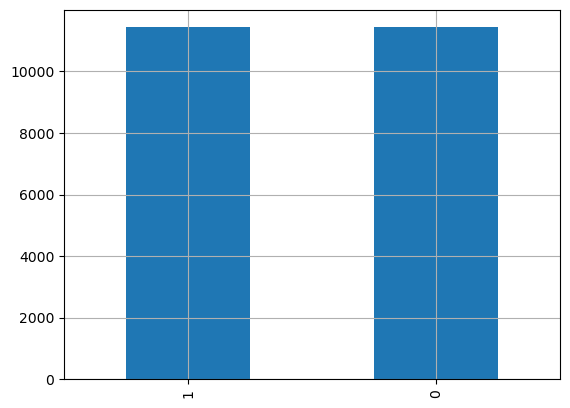

In [53]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

In [54]:
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)   

In [55]:
# split data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled , train_size=0.7, test_size=0.3, random_state=3)

print("data is split into training and validation sub-datasets")

data is split into training and validation sub-datasets


In [56]:
print(X.shape,X_train.shape,X_test.shape)

(14999, 9) (15999, 9) (6857, 9)


In [57]:
lr = LogisticRegression().fit(X_train,y_train)
model_predictions = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.775849496864518
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3433
           1       0.76      0.81      0.78      3424

    accuracy                           0.78      6857
   macro avg       0.78      0.78      0.78      6857
weighted avg       0.78      0.78      0.78      6857



C:\Users\saiku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [58]:
kn = KNeighborsClassifier().fit(X_train,y_train)
model_predictions = kn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9526031792329007
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3433
           1       0.93      0.98      0.95      3424

    accuracy                           0.95      6857
   macro avg       0.95      0.95      0.95      6857
weighted avg       0.95      0.95      0.95      6857



C:\Users\saiku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [59]:
svc = SVC().fit(X_train,y_train)
model_predictions = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8879976666180546
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3433
           1       0.87      0.91      0.89      3424

    accuracy                           0.89      6857
   macro avg       0.89      0.89      0.89      6857
weighted avg       0.89      0.89      0.89      6857



In [60]:
GaussianNB = GaussianNB().fit(X_train,y_train)
model_predictions = GaussianNB.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.6674930727723494
              precision    recall  f1-score   support

           0       0.92      0.37      0.53      3433
           1       0.60      0.97      0.74      3424

    accuracy                           0.67      6857
   macro avg       0.76      0.67      0.64      6857
weighted avg       0.76      0.67      0.64      6857



In [61]:
DTC = DecisionTreeClassifier().fit(X_train,y_train)
model_predictions = DTC.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9718535802829226
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3433
           1       0.97      0.98      0.97      3424

    accuracy                           0.97      6857
   macro avg       0.97      0.97      0.97      6857
weighted avg       0.97      0.97      0.97      6857



In [62]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9848330173545282
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3433
           1       0.99      0.97      0.98      3424

    accuracy                           0.98      6857
   macro avg       0.99      0.98      0.98      6857
weighted avg       0.99      0.98      0.98      6857



In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

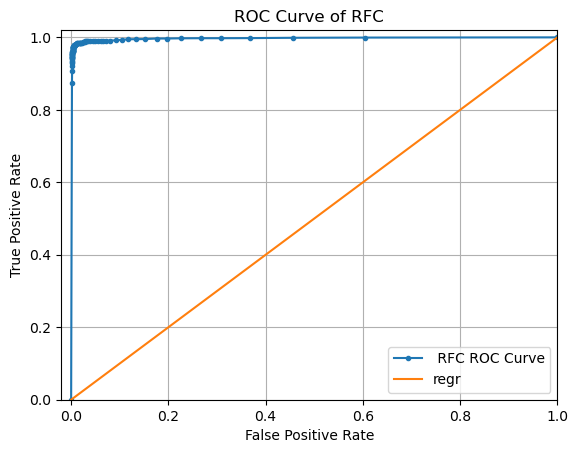

 ROC AUC Score of RFC: 99.66


In [64]:
#model = fitted_models['rfc'].best_estimator_
rfc_y_pred_prob = model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, rfc_y_pred_prob)
# plot the ROC Curve
plt.plot(rfc_fpr, rfc_tpr, marker='.', label=' RFC ROC Curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RFC')
plt.legend(loc="lower right")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
rfc_auc = round(roc_auc_score(y_test, rfc_y_pred_prob)*100,2)
print(' ROC AUC Score of RFC:',rfc_auc)

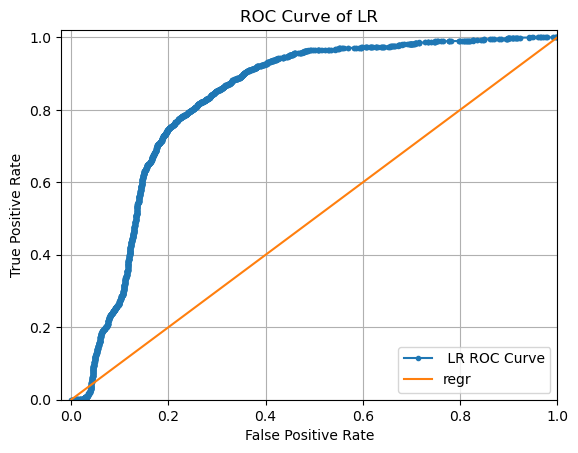

 ROC AUC Score of LR: 99.66


In [65]:
#model = fitted_models['LR'].best_estimator_
LR_y_pred_prob = lr.predict_proba(X_test)[:,1]
LR_fpr, LR_tpr, threshold = roc_curve(y_test, LR_y_pred_prob)
# plot the ROC Curve
plt.plot(LR_fpr, LR_tpr, marker='.', label=' LR ROC Curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LR')
plt.legend(loc="lower right")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
LR_auc = round(roc_auc_score(y_test, LR_y_pred_prob)*100,2)
print(' ROC AUC Score of LR:',rfc_auc)

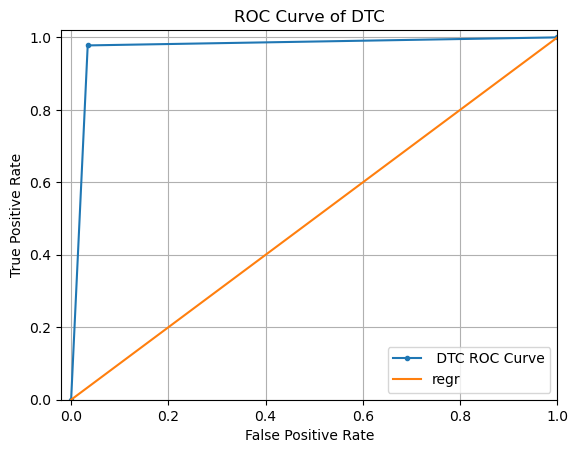

 ROC AUC Score of DTC: 97.19


In [66]:
#model = fitted_models['DTC'].best_estimator_
DTC_y_pred_prob = DTC.predict_proba(X_test)[:,1]
DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, DTC_y_pred_prob)
# plot the ROC Curve
plt.plot(DTC_fpr, DTC_tpr, marker='.', label=' DTC ROC Curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of DTC')
plt.legend(loc="lower right")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
DTC_auc = round(roc_auc_score(y_test, DTC_y_pred_prob)*100,2)
print(' ROC AUC Score of DTC:',DTC_auc)

In [73]:
!pip install pingouin

     -------------------------------------- 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=c5544267ce980eb5bc4897ad32133d0af2387583483e0a22f17c0c5d05644ed7
  Stored in directory: c:\users\saiku\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [74]:
import pingouin

In [75]:
pingouin.anova(dv = 'satisfaction_level', between = 'left',data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,left,1,14997,2663.881285,0.0,0.150835


pon conducting further analysis using anova test, the resulting p-value (p-unc) was found to be 0.00, which is less than the significance level of 0.05. This indicates with 95% confidence that the satisfaction level of employees who left is significantly lower than that of employees who stayed. Hence, we reject the null hypothesis (H0) and accept the alternative hypothesis (H1), which states that the satisfaction level is lower for employees who leave.

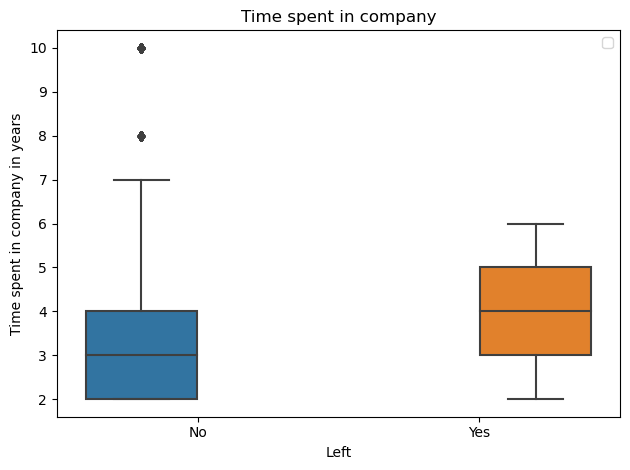

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


In [77]:
sns.boxplot(y='time_spend_company',x='left', data = df, hue = 'left')
plt.xlabel('Left')
plt.ylabel('Time spent in company in years')
plt.title('Time spent in company')
plt.xticks([0,1],['No','Yes'])
plt.legend("")
plt.tight_layout()
plt.show()

df.groupby('left')['time_spend_company'].describe()

According to the boxplot, employees who left the company had a longer average tenure than those who stayed, indicated by the median of 4 years and 3 years respectively. Furthermore, the average tenure of employees who left is higher than those who stayed, with 3.9 years and 3.4 years respectively. The maximum tenure for employees who left the company is 6 years, whereas the maximum for employees who stayed is 10 years.

In [78]:
pingouin.anova(data = df, dv = 'time_spend_company', between = 'left')

,Source,ddof1,ddof2,F,p-unc,np2
0,left,1,14997,321.277313,4.207680e-71,0.020973


Based on the ANOVA tests, we can conclude with 95% confidence that there is a significant difference between the time spent at the company by employees who left and those who did not, as indicated by a p-value of 0.000. Therefore, we reject the null hypothesis in favor of the alternative hypothesis that states the time spent in the company by employees who left is greater. This suggests that employees who have been with the company for a longer time are more likely to leave than those who are newly recruited.

### The number of projects by employees that left is not equal to those that stayed

Hypothesis

H0: The number of projects by employees that stayed and those that left is equal

H1: The number of projects by employees that stayed is not equal to those that left

,count,mean,std,min,0%,10%,30%,40%,50%,60%,70%,90%,max
left,,,,,,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,6.0,7.0


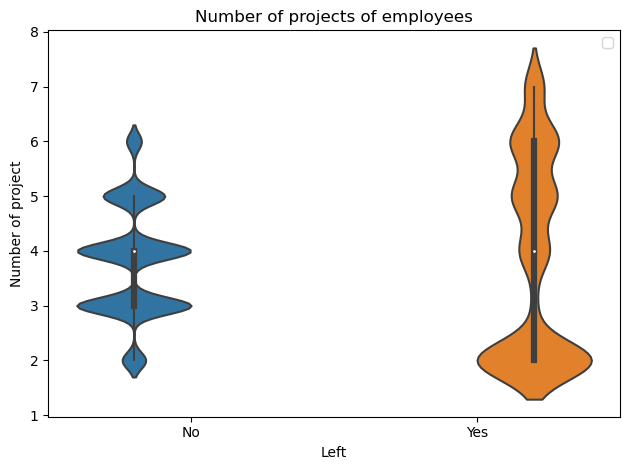

In [81]:
display(df.groupby('left')['number_project'].describe(percentiles=[0,.1,.3,.4,.6,.7,.9]))
print()
sns.violinplot(x = 'left', y = 'number_project', data = df, hue = 'left')
plt.ylabel('Number of project')
plt.xlabel('Left')
plt.title('Number of projects of employees')
plt.xticks([0,1],['No','Yes'])
plt.legend("")
plt.tight_layout()
plt.show()

Summary statistics reveal that there is no significant difference in the median number of projects completed by employees who left the company and those who remained. However, there is a slight disparity in their means. The violin plot indicates that a considerable proportion of employees who left the company worked on only two projects, evidenced by the bulge at the value of 2. In contrast, most employees who stayed at the company worked on three or four projects, with a minority working on two or six projects. This observation is consistent with the summary statistics, which indicate that up to the 40th percentile of employees who stayed at the company worked on three projects, while those who left the company worked on only two projects.

In [83]:
proj_left = df.loc[df.left == 1, 'number_project']
proj_stay = df.loc[df.left == 0, 'number_project']

pingouin.ttest(x = proj_left, y = proj_stay, alternative = 'two-sided', paired = False, confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.166342,4236.542893,two-sided,0.030341,"[0.01, 0.13]",0.055862,0.225,0.829884


Based on the t-test results with a p-value of 0.03, we can conclude with 95% confidence that there is a significant difference in the number of projects worked on by employees who left the company and those who stayed. Although the summary statistics suggest no difference in medians, further analysis using t-tests accounts for the distribution of the data and reveals differences. Therefore, we reject the null hypothesis (H0) in favor of the alternative hypothesis (H1) which states that the number of projects worked on by employees who stayed is not equal to those who left.

In [85]:
left_employees_hours = df[df['left'] == 1]['average_montly_hours']
stayed_employees_hours = df[df['left'] == 0]['average_montly_hours']

pingouin.ttest(x = left_employees_hours, y = stayed_employees_hours, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.532289,4875.061919,greater,2.953527e-14,"[6.53, inf]",0.167792,8.236e+10,1.0


Based on the results of the t-test analysis, we can conclude with 95% confidence that the average monthly working hours of employees who left the company is significantly higher than that of employees who stayed, as indicated by a p-value of 0.000, which is less than the predefined significance level of 0.05. The estimated difference between the two groups is at least 6.5 hours. Therefore, we reject the null hypothesis (H0) in favor of the alternative hypothesis (H1) that the average monthly working hours of employees who left the company is greater.

### Recommendations
Our analysis in section 4 indicates that employees who left the company were less satisfied than those who stayed. To improve employee retention, it is recommended that the company takes measures to ensure that its employees are satisfied. Our findings also suggest that monthly working hours, salary, and promotions may not be significant factors affecting employee satisfaction. Further research is recommended to identify factors to improve employee satisfaction.

Our analysis indicates that employees who left had longer tenures with the company. Studies have shown that long-serving employees may leave due to inadequate pay, lack of opportunities for career advancement, and limited growth prospects. Therefore, further research is recommended to identify strategies to retain long-serving employees.

It is recommended that the company ensure the fair distribution of projects among employees to promote equity and minimize employee dissatisfaction.

Our analysis suggests that employees who left worked longer hours per month than those who stayed, indicating the possibility of overwork. To address this, the company should consider implementing standardized working hours and offering overtime pay for employees who work additional hours.

In [67]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [68]:
# Initialising the ANN
classifier = Sequential()

In [69]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=9))
classifier.add(Dropout(0.3))

In [70]:
# Adding the second hidden layer
classifier.add(Dense(units=20, kernel_initializer='he_normal', activation='relu',))
classifier.add(Dropout(0.4))

In [71]:
# Adding the third hidden layer
classifier.add(Dense(units=15, kernel_initializer='he_normal', activation='relu',))
classifier.add(Dropout(0.2))

In [72]:
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)

In [ ]:
# list all data in history
print(model_history.history.keys())

In [ ]:
# summarize history for accuracy
#plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score